### **1) We created the collab file with extension of .ipynb**

### **2) Importing Required Libraries**

In [77]:
# We import the libraries we need.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
#  We load the data set.
data = pd.read_csv('./insurance.csv')

# We copy from the data we loaded in the data variable so the original data stays unchanged.
# df(dataFrame)
df= data.copy()
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#  We check whether or not any Null value exists.
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#  We get info about or data
df.info()
# There is no null value,
# There are ints, objects,floats as data types.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# We need to see how many smokers and non smokers there are.
df['smoker'].value_counts()

# There 274 yes (smoker) , 1064 no (non-smoker)

no     1064
yes     274
Name: smoker, dtype: int64

### **3) Perform An Exploratory Data Analysis**

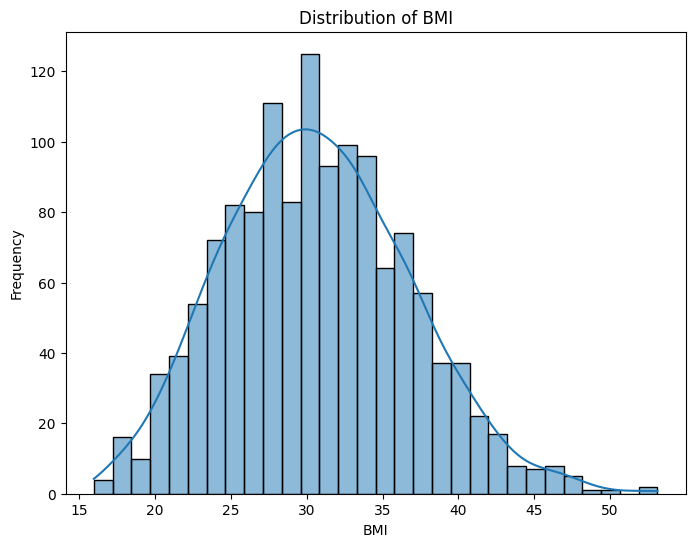

In [ ]:
# Let's examine the distribution of BMI (Body Mass Index)
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="bmi", bins=30, kde=True)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

# The outcome of this analysis gives this conclusion:
# It suggests that the BMI values are roughly normally distributed.
# The majority of individuals appear to have BMI values clustered around a central range,
# indicating that many are likely to have a moderate BMI

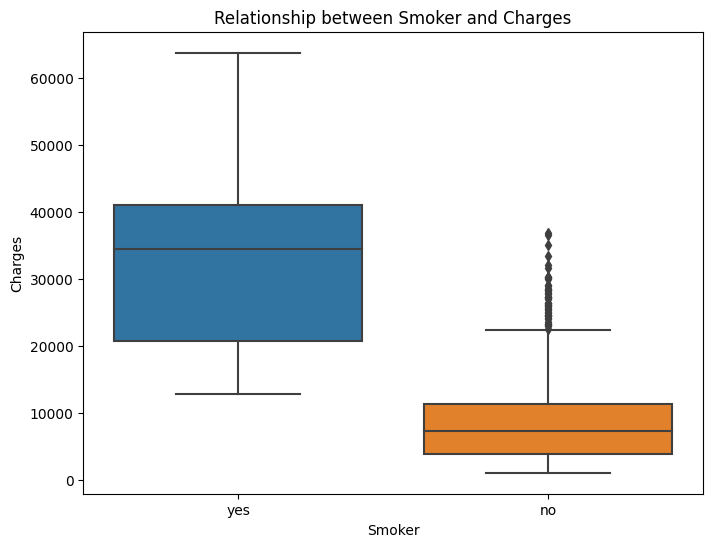

In [ ]:
# Examine the relationship between "smoker" and "charges"
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="smoker", y="charges")
plt.title("Relationship between Smoker and Charges")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()


# The outcome of this analysis gives this conclusion:
# Smokers charged more compared to non-smokers.
# Some of the smokers charged even higher than other smokers cause there are outliers.
# There are also outliers on the non-smokers' side that indicates:
# Some of the non-smokers charged as much as a smoker but
# There can be many reasons like they might have other diseases, different costs of insurance companies and such.


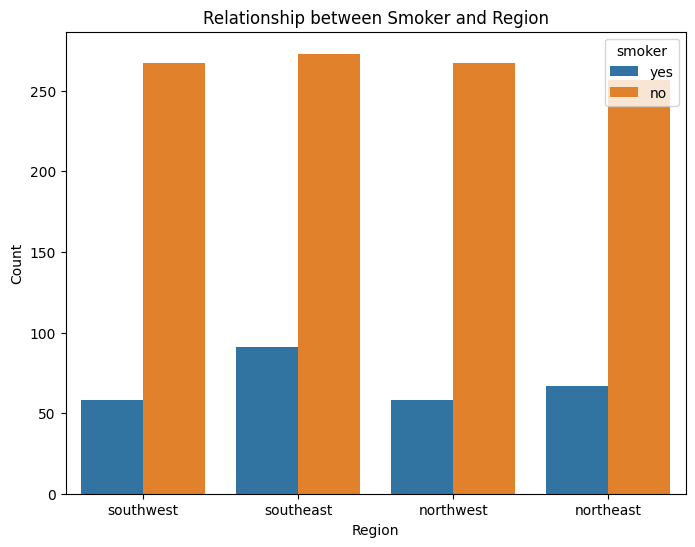

In [ ]:
# Examine the relationship between "smoker" and "region"
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="region", hue="smoker")
plt.title("Relationship between Smoker and Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

# The outcome of this analysis gives this conclusion:
# There are more smokers than non-smokers in almost every region.
# But there is more gap between smokers and non-smokers in southwest and northwest regions.

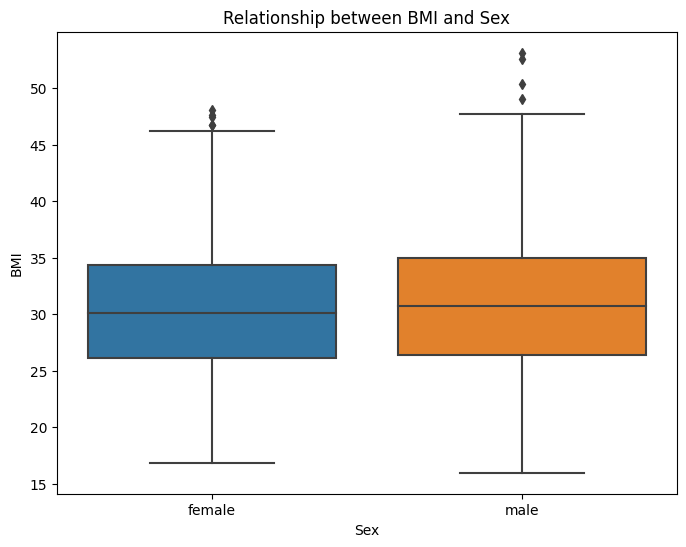

In [ ]:
# Examine the relationship between "BMI" and "sex"
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="sex", y="bmi")
plt.title("Relationship between BMI and Sex")
plt.xlabel("Sex")
plt.ylabel("BMI")
plt.show()

# The outcome of this analysis gives this conclusion:
# Males generally having slightly higher median "BMI" values than females.
# There are outliers in both groups that indicates some of them have higher BMIs than usual
# Nonetheless, the distribution of "BMI" values for both genders is similar in terms of spread and variability

In [ ]:
# Find the "region" with the most "children"
region_children = df.groupby("region")["children"].sum().sort_values(ascending=False)
most_children_region = region_children.idxmax()
print(f"Region with the most children: {most_children_region}")

# The outcome of this analysis gives us the most children in all of the regions
# idxmax() method returns a series with the index of the maximum value for each column

Region with the most children: southeast


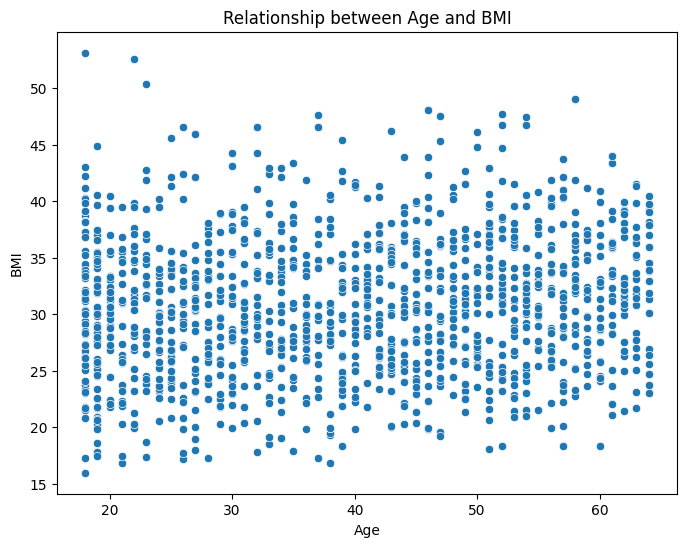

In [ ]:
# sixth Examine the relationship between "age" and "BMI"
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="age", y="bmi")
plt.title("Relationship between Age and BMI")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

# The outcome of this analysis gives us:
# There is no linear distribution between age and BMI.
# There is not indication that BMI changes according to age.


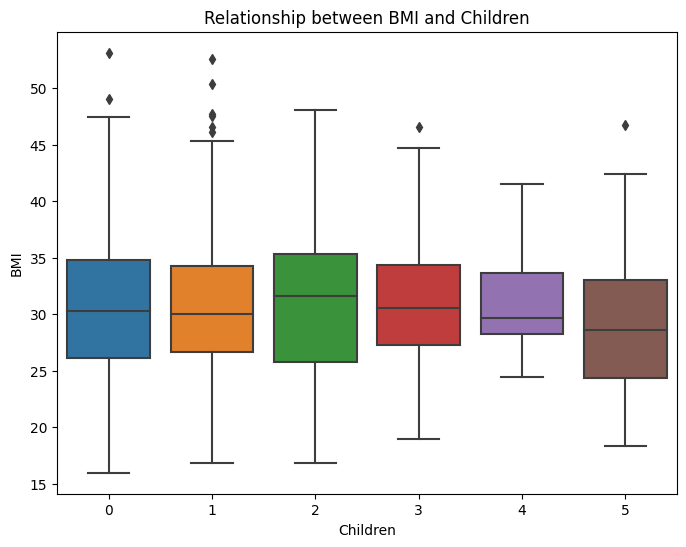

In [ ]:
# seventh Examine the relationship between "BMI" and "children"
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="children", y="bmi")
plt.title("Relationship between BMI and Children")
plt.xlabel("Children")
plt.ylabel("BMI")
plt.show()


# The outcome of this analysis gives us:
# There is no correlation between BMI distribution and Children.
# There are some outliers (higher BMI values) but from most of the graph we can understand that:
# Number of children doesn't affect the BMI values on individuals.

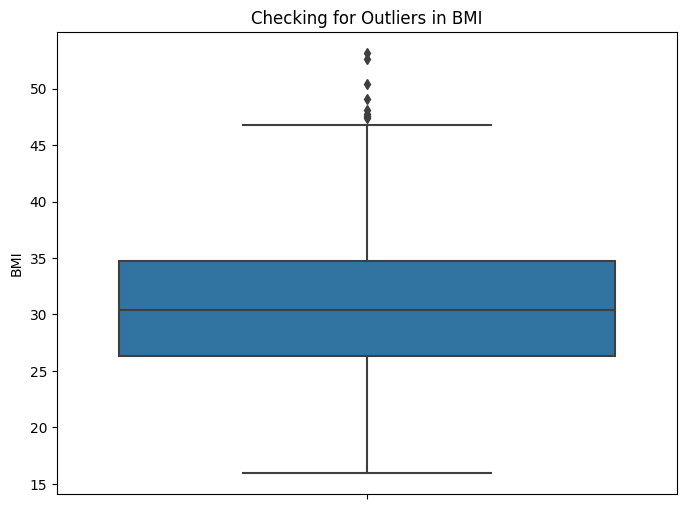

In [ ]:
# Check for outliers in the "BMI" variable
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y="bmi")
plt.title("Checking for Outliers in BMI")
plt.ylabel("BMI")
plt.show()

# The outcome of this analysis gives us:
# There are outliers those who have higher BMIs.
# But from all of these analysis we can't tell:
# If it is just because of smoking, age or children.
# It can be because of many factors that were and weren't included in the dataset.

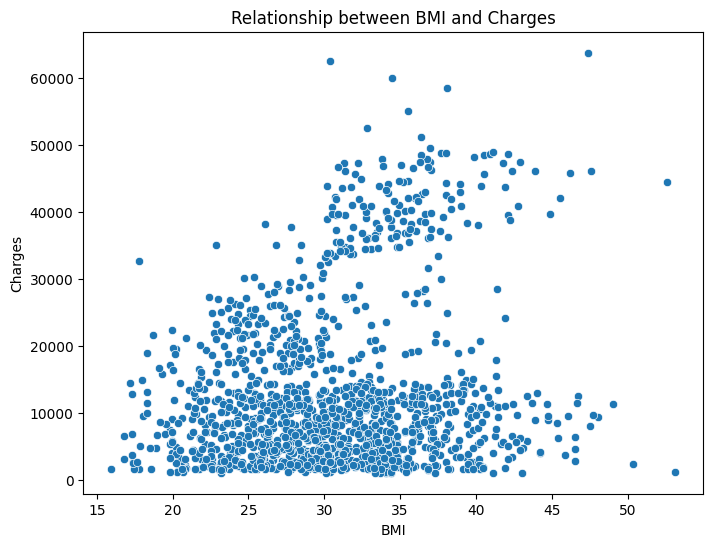

In [ ]:
# Examine the relationship between "BMI" and "charges"
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="bmi", y="charges")
plt.title("Relationship between BMI and Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()


# The outcome of this analysis gives us:
# People with similar BMIs seems to have similar medical costs.
# This may indicates BMI affects health insurance charges.
# People with BMI between 15 to 40 charged with similar medical costs
# In the range of 0-20000
# And even though there are some outliers
# We can say people with higher BMIs have higher insurance costs.

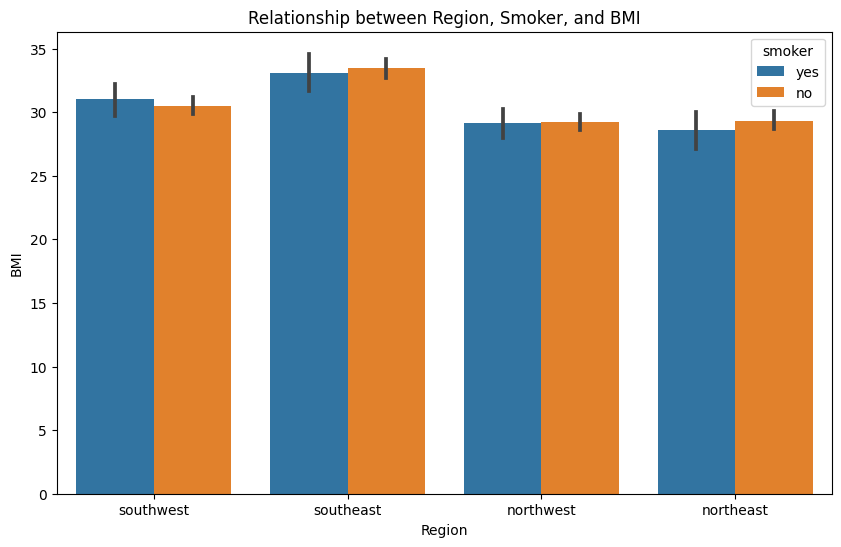

In [ ]:
# Examine the relationship between "region", "smoker", and "bmi"
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="region", y="bmi", hue="smoker")
plt.title("Relationship between Region, Smoker, and BMI" )
plt.xlabel("Region")
plt.ylabel("BMI")
plt.show()

# The outcome of this analysis gives us:
# There isn't a bigger BMI difference between smokers and non-smokers
# But there is a slightly more gap between smokers and non-smokers' BMI
# In the Southwest and Northeast regions.
# However we can also say smoking habits and BMI
# doesn't change greatly across these regions

### **4) Data Preprocessing**

In [ ]:

label_encoder = LabelEncoder()

# Handle missing values
df.dropna(inplace=True)

# Apply Label Encoding to 'region'
df['region_encoded'] = label_encoder.fit_transform(data['region'])

print(data[['region', 'region_encoded']].head())




      region  region_encoded
0  southwest               3
1  southeast               2
2  southeast               2
3  northwest               1
4  northwest               1


In [ ]:

# Before using our data we need to convert categorical variables to numerical
# using one-hot encoding
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = onehot_encoder.fit_transform(data[['sex', 'smoker']])

# We create a dataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(['sex', 'smoker']))

# Let's see the encoded dataFrame
print(encoded_df.head());

# We need to drop unnecessary columns and separate target variable (charges)
X = df.drop(['sex', 'smoker', 'charges'], axis=1)
y = df['charges']

# We use one-hot encoding on categorical columns
categorical_columns = ['region']
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
# get_dummies() convert categorical variables into dummy or indicator variables that can have the value 0 or 1

   sex_male  smoker_yes
0       0.0         1.0
1       1.0         0.0
2       1.0         0.0
3       1.0         0.0
4       1.0         0.0


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# We split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# We scale the dataSet usomg minmaxscaler()
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


RandomForestRegressor RMSE: 12200.552370539419
RandomForestRegressor R-squared Score: 0.041193594846456794
RandomForestRegressor Correlation Coefficient: 0.23264827022472823
RandomForestRegressor Actual Charges Mean: 12968.317062869404
RandomForestRegressor Predicted Charges Mean: 13843.549095461189
   


### **5) Model Selection**

In [72]:

# We need to initialize our models so we can try them out
models = [

  RandomForestRegressor(),
  LinearRegression(),
  DecisionTreeRegressor(),
  SVR()
]

# We train and evaluate models in a loop so we can try them faster
for model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    print(f"{model.__class__.__name__} RMSE: {rmse}")

    # R-squared score
    r2 = r2_score(y_test, y_pred)
    print(f"{model.__class__.__name__} R-squared Score: {r2}")

    # Correlation coefficient
    correlation = y_test.corr(pd.Series(y_pred))
    print(f"{model.__class__.__name__} Correlation Coefficient: {correlation}")

    # The mean of actual charges
    actual_charges_mean = y_test.mean()
    print(f"{model.__class__.__name__} Actual Charges Mean: {actual_charges_mean}")

    # The mean of predicted charges
    predicted_charges_mean = y_pred.mean()
    print(f"{model.__class__.__name__} Predicted Charges Mean: {predicted_charges_mean}")
    print("   ")

chosen_model= LinearRegression()
chosen_model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)

# Based on the output of all of the models we tried out linear regression and
# RandomForestRegressor seems the most suitable options
# However, we have both numerical and categorical features
# So instead of deleting any category I tried it with
# RandomForestRegressor


RandomForestRegressor RMSE: 12291.659340923725
RandomForestRegressor R-squared Score: 0.026820458360245603
RandomForestRegressor Correlation Coefficient: 0.24688926499921637
RandomForestRegressor Actual Charges Mean: 12968.317062869404
RandomForestRegressor Predicted Charges Mean: 13937.969250577456
   
LinearRegression RMSE: 11422.48910912473
LinearRegression R-squared Score: 0.15958567780641264
LinearRegression Correlation Coefficient: 0.09982895881357848
LinearRegression Actual Charges Mean: 12968.317062869404
LinearRegression Predicted Charges Mean: 13320.91231495097
   
DecisionTreeRegressor RMSE: 17285.949176764356
DecisionTreeRegressor R-squared Score: -0.9246794229524098
DecisionTreeRegressor Correlation Coefficient: 0.1512496773540021
DecisionTreeRegressor Actual Charges Mean: 12968.317062869404
DecisionTreeRegressor Predicted Charges Mean: 13474.907005466417
   
SVR RMSE: 12908.118986434507
SVR R-squared Score: -0.07324249394449978
SVR Correlation Coefficient: 0.0390847709153

### **6) Hyper-parameter Optimization**


In [73]:

# We define the parameter distributions first, initialise search
# And fit the randomised search to the data
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(randint(10, 100).rvs(10)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

rf_model = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   scoring='neg_mean_squared_error', cv=5, n_iter=100,
                                   verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train_scaled, y_train)
best_params = random_search.best_params_

print("Best Hyperparameters:", best_params)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'max_depth': 36, 'min_samples_leaf': 19, 'min_samples_split': 18, 'n_estimators': 279}


### **7) Model Evaluation**

In [82]:
best_max_depth = 36
best_min_samples_leaf = 19
best_min_samples_split = 18
best_n_estimators = 279

# Next we create the RandomForestRegressor model with the best hyperparameters

best_rf_model = RandomForestRegressor(
    max_depth=best_max_depth,
    min_samples_leaf=best_min_samples_leaf,
    min_samples_split=best_min_samples_split,
    n_estimators=best_n_estimators,
    random_state=42
)
# We train the model on the best model
best_rf_model.fit(X_train_scaled, y_train)


# We need to use the best model to make predictions
y_pred = best_rf_model.predict(X_test_scaled)

# RMSE and R-2
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor Model:")
print(f"RMSE: {rmse}")
print(f"R-squared Score: {r2}")

# Mean squared error
mse= mean_squared_error(y_test,y_pred)
print(f"MSE: {mse}")

# Correlation coefficient
correlation = y_test.corr(pd.Series(y_pred))
print(f"Correlation Coefficient: {correlation}")

# The mean of actual charges
actual_charges_mean = y_test.mean()
print(f"Actual Charges Mean: {actual_charges_mean}")

# Mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error with Random Forest:", mae)

# The mean of predicted charges
predicted_charges_mean = y_pred.mean()
print(f"Predicted Charges Mean: {predicted_charges_mean}")
print("   ")


# I am not sure if I got the best results.

Random Forest Regressor Model:
RMSE: 11490.014797220032
R-squared Score: 0.14961984699159392
MSE: 132020440.0403353
Correlation Coefficient: 0.1325646721361403
Actual Charges Mean: 12968.317062869404
Mean Absolute Error with Random Forest: 9196.697910654771
Predicted Charges Mean: 13366.474507269428
   
